# <center>Prediction Of Maternal Health Risk Using Machine Learning

<img src="mhphoto.png" width=1000, height=600>

#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.metrics import roc_curve, auc,accuracy_score,confusion_matrix
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import label_binarize, StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from itertools import cycle

#### Loading the dataset

In [2]:
df = pd.read_csv('./Maternal Health Risk Data Set.csv')
df.sample(10)

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
1011,35,85,60,19.00,98.0,86,high risk
6,23,130,70,7.01,98.0,78,mid risk
469,30,120,80,6.80,101.0,76,low risk
987,17,90,63,8.00,101.0,70,high risk
982,55,140,80,7.20,101.0,76,high risk
155,12,95,60,7.50,98.0,65,low risk
628,15,120,80,7.50,98.0,70,low risk
702,21,90,50,6.90,98.0,60,low risk
503,25,140,100,7.90,98.0,80,high risk
390,17,85,69,7.80,102.0,86,high risk


#### Exploring the data

In [3]:
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [4]:
df.tail()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk
1013,32,120,65,6.0,101.0,76,mid risk


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [6]:
df.shape

(1014, 7)

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1014.0,29.871795,13.474386,10.0,19.0,26.0,39.0,70.0
SystolicBP,1014.0,113.198225,18.403913,70.0,100.0,120.0,120.0,160.0
DiastolicBP,1014.0,76.460552,13.885796,49.0,65.0,80.0,90.0,100.0
BS,1014.0,8.725986,3.293532,6.0,6.9,7.5,8.0,19.0
BodyTemp,1014.0,98.665089,1.371384,98.0,98.0,98.0,98.0,103.0
HeartRate,1014.0,74.301775,8.088702,7.0,70.0,76.0,80.0,90.0


In [8]:
df.rename(columns={"BS":"BloodSugar"},inplace=True)

#### checking the null percentage

In [9]:
df.isnull().mean()*100

Age            0.0
SystolicBP     0.0
DiastolicBP    0.0
BloodSugar     0.0
BodyTemp       0.0
HeartRate      0.0
RiskLevel      0.0
dtype: float64

#### Chceking duplicate values

In [10]:
df.duplicated().mean()*100

55.42406311637082

In [11]:
df.drop_duplicates(inplace=True)

## Explorartory Data Analysis

### Univariate Analysis

#### Histogram 

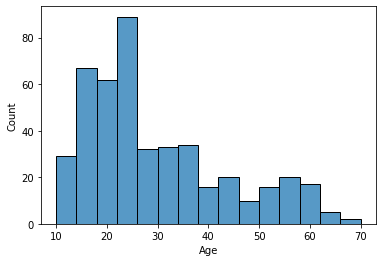

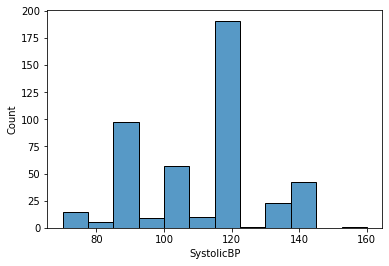

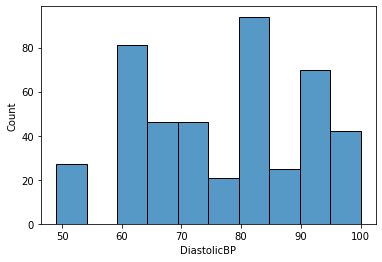

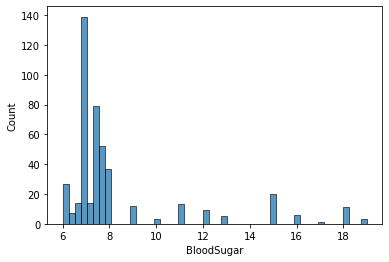

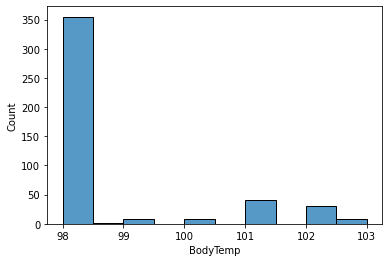

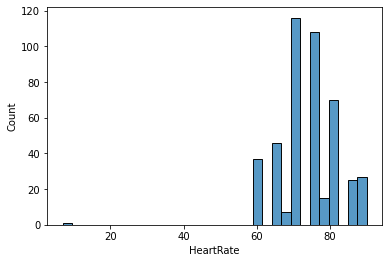

In [12]:
for i in df.columns:
    if df[i].dtype !="object":
        sns.histplot(x=df[i])
        plt.show();

#### Kde Plot

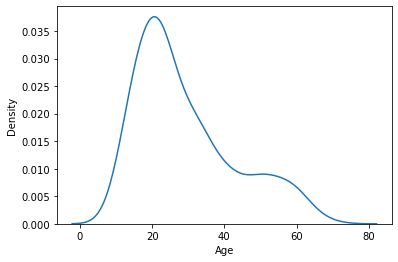

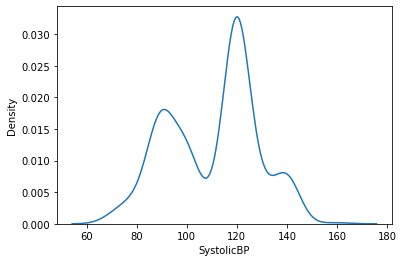

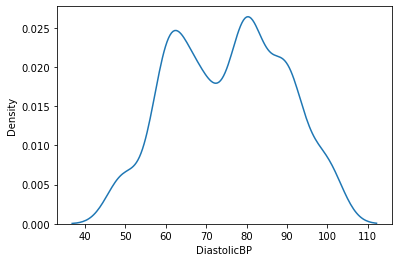

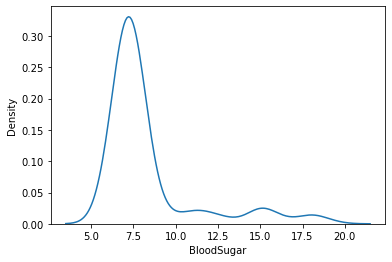

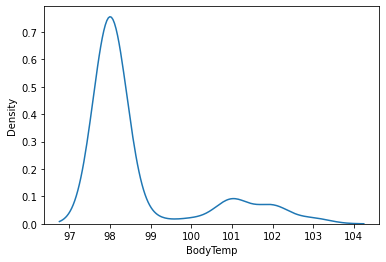

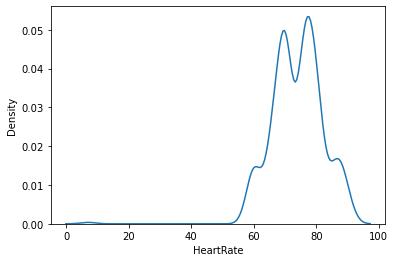

In [13]:
for i in df.columns:
    if df[i].dtype !="object":
        sns.kdeplot(x=df[i])
        plt.show();

#### Box Plot

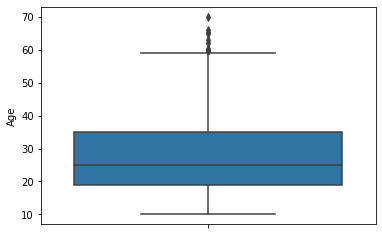

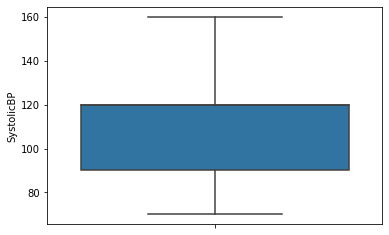

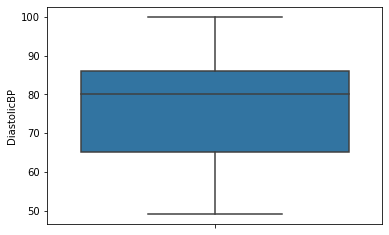

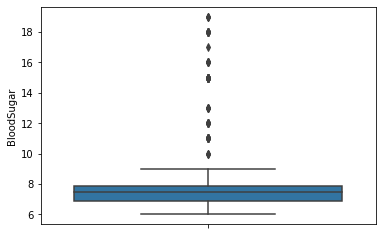

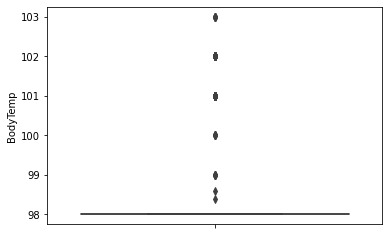

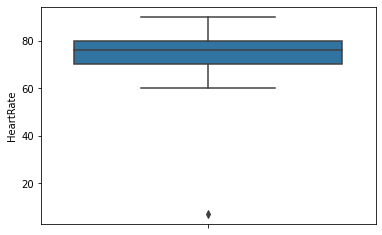

In [14]:
for i in df.columns:
    if df[i].dtype !="object":
        sns.boxplot(y=df[i])
        plt.show();

### Multivariate Analysis

#### Bar Chart

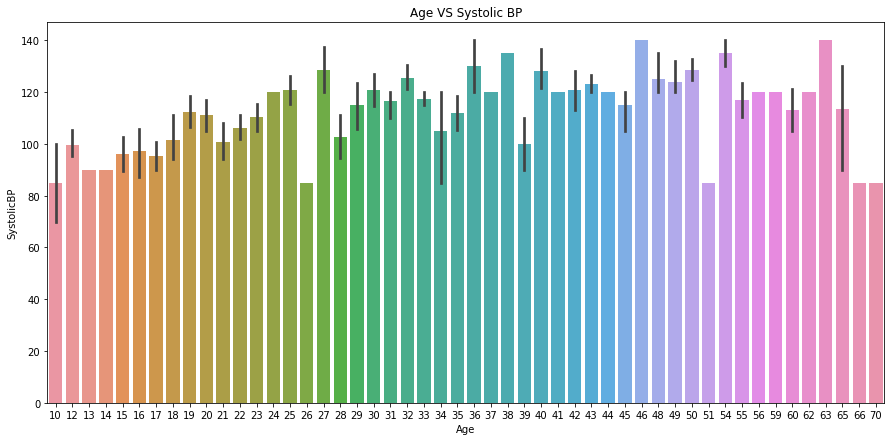

In [15]:
plt.figure(figsize=(15,7))
plt.title("Age VS Systolic BP")
sns.barplot(x='Age', y='SystolicBP', data=df);

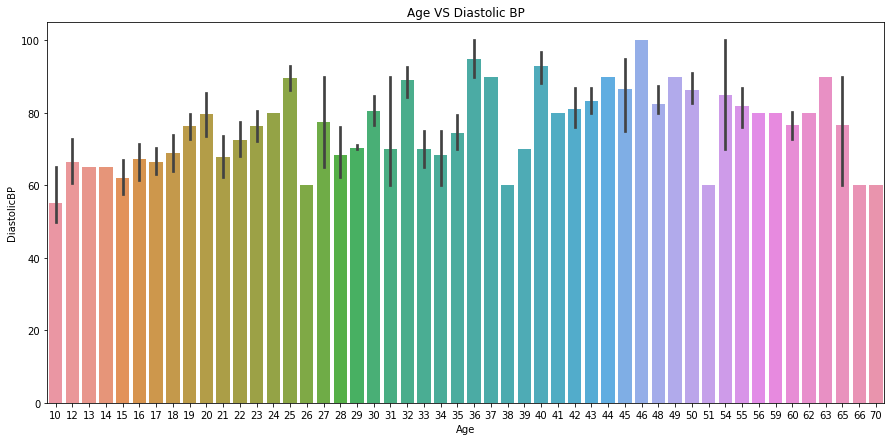

In [16]:
plt.figure(figsize=(15,7))
plt.title("Age VS Diastolic BP")
sns.barplot(x='Age', y='DiastolicBP', data=df);

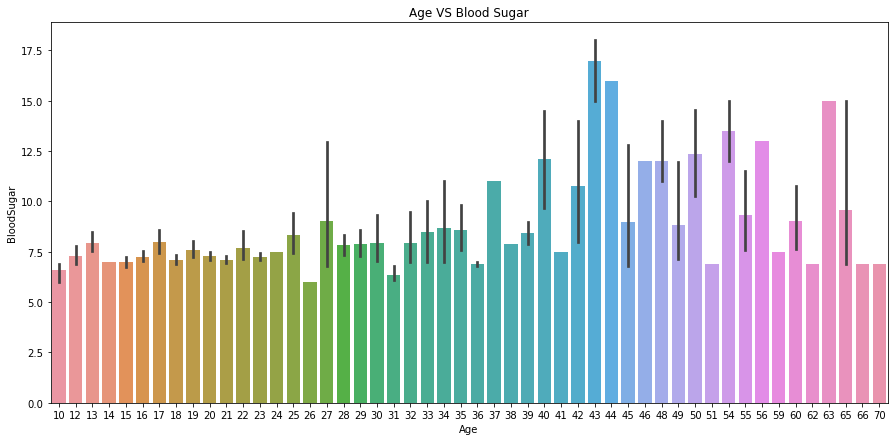

In [17]:
plt.figure(figsize=(15,7))
plt.title("Age VS Blood Sugar")
sns.barplot(x='Age', y='BloodSugar', data=df);

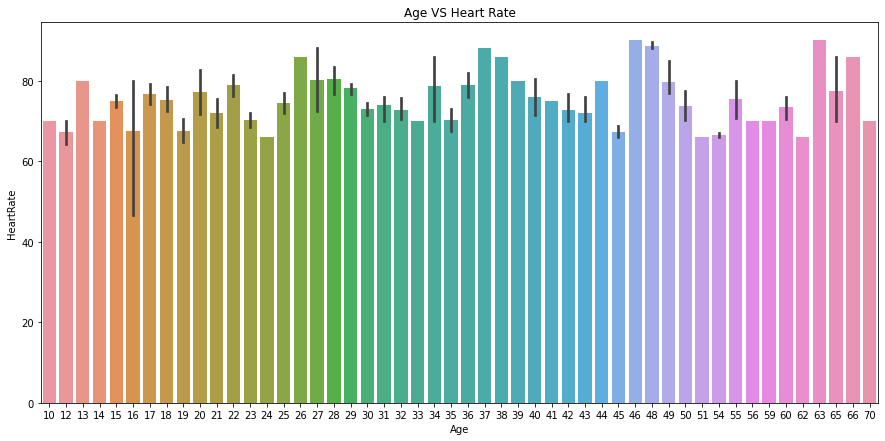

In [18]:
plt.figure(figsize=(15,7))
plt.title("Age VS Heart Rate")
sns.barplot(x='Age', y='HeartRate', data=df);

In [19]:
df.columns

Index(['Age', 'SystolicBP', 'DiastolicBP', 'BloodSugar', 'BodyTemp',
       'HeartRate', 'RiskLevel'],
      dtype='object')

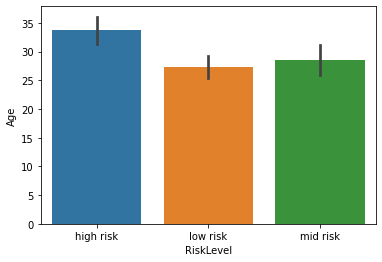

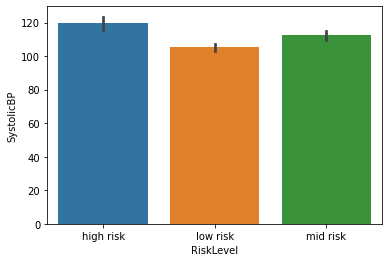

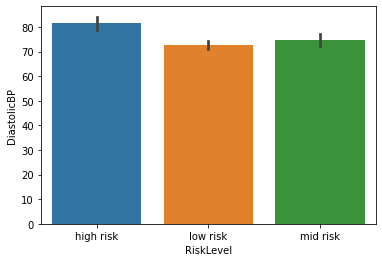

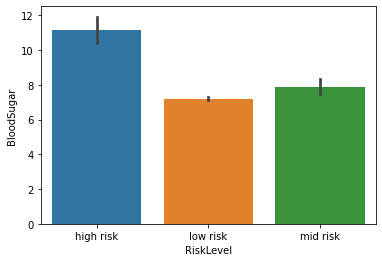

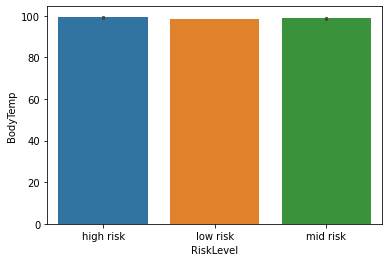

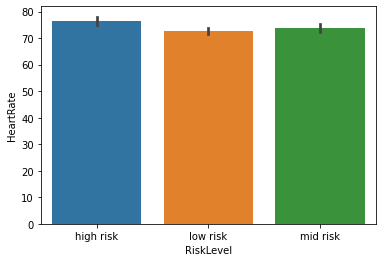

In [20]:
a = ['Age', 'SystolicBP', 'DiastolicBP', 'BloodSugar', 'BodyTemp','HeartRate']
for i in a:
    sns.barplot(x="RiskLevel",y=df[i],data=df);
    plt.show();

#### Pie Chart

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 452 entries, 0 to 705
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          452 non-null    int64  
 1   SystolicBP   452 non-null    int64  
 2   DiastolicBP  452 non-null    int64  
 3   BloodSugar   452 non-null    float64
 4   BodyTemp     452 non-null    float64
 5   HeartRate    452 non-null    int64  
 6   RiskLevel    452 non-null    object 
dtypes: float64(2), int64(4), object(1)
memory usage: 44.4+ KB


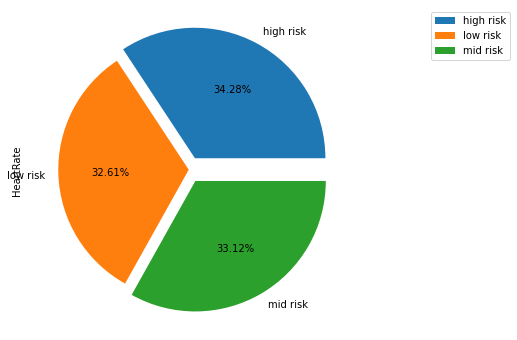

In [22]:
plt.figure(figsize=(14,6))
risk_HeartRate=df.groupby(['RiskLevel'])['HeartRate'].mean()
explode=0.1,0,0.1
risk_HeartRate.plot.pie(autopct='%1.2f%%',explode=explode)
plt.legend(bbox_to_anchor=(1.5,1))
plt.show()

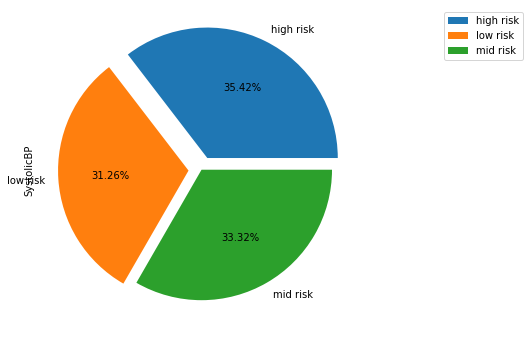

In [23]:
plt.figure(figsize=(14,6))
risk_SystolicBP=df.groupby(['RiskLevel'])['SystolicBP'].mean()
explode=0.1,0.1,0
risk_SystolicBP.plot.pie(autopct='%1.2f%%',explode=explode)
plt.legend(bbox_to_anchor=(1.5,1))
plt.show()

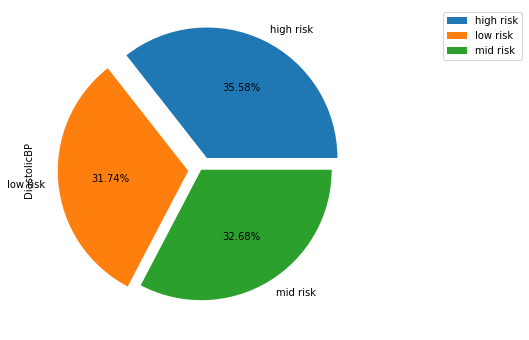

In [24]:
plt.figure(figsize=(14,6))
risk_diastolicBP=df.groupby(['RiskLevel'])['DiastolicBP'].mean()
explode=0.1,0.1,0
risk_diastolicBP.plot.pie(autopct='%1.2f%%',explode=explode)
plt.legend(bbox_to_anchor=(1.5,1))
plt.show()

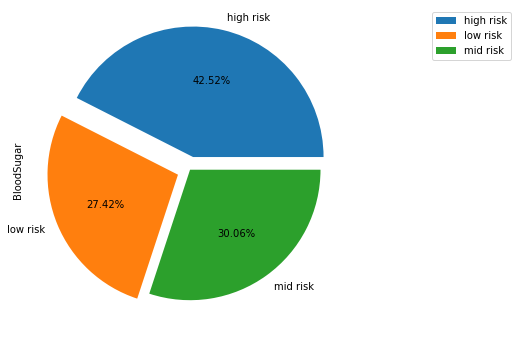

In [25]:
plt.figure(figsize=(14,6))
risk_bloodsugar=df.groupby(['RiskLevel'])['BloodSugar'].mean()
explode=0.1,0.1,0
risk_bloodsugar.plot.pie(autopct='%1.2f%%',explode=explode)
plt.legend(bbox_to_anchor=(1.5,1))
plt.show()

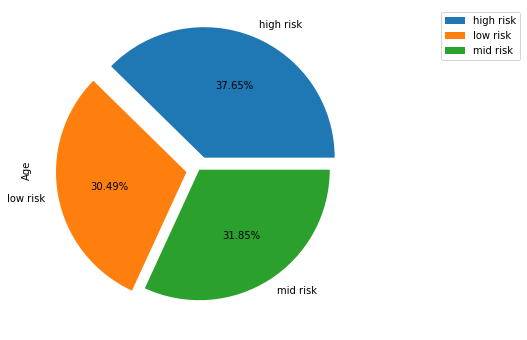

In [26]:
plt.figure(figsize=(14,6))
risk_age=df.groupby(['RiskLevel'])['Age'].mean()
explode=0.1,0.1,0
risk_age.plot.pie(autopct='%1.2f%%',explode=explode)
plt.legend(bbox_to_anchor=(1.5,1))
plt.show()

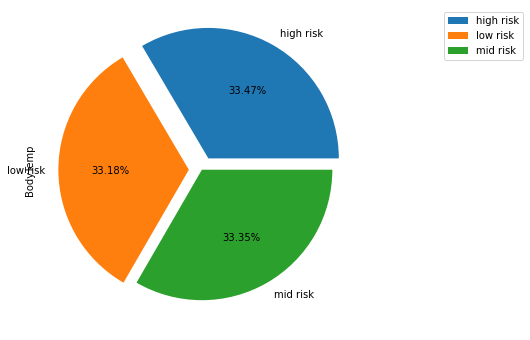

In [27]:
plt.figure(figsize=(14,6))
risk_bodytemp=df.groupby(['RiskLevel'])['BodyTemp'].mean()
explode=0.1,0.1,0
risk_bodytemp.plot.pie(autopct='%1.2f%%',explode=explode)
plt.legend(bbox_to_anchor=(1.5,1))
plt.show()

#### Pair Plot

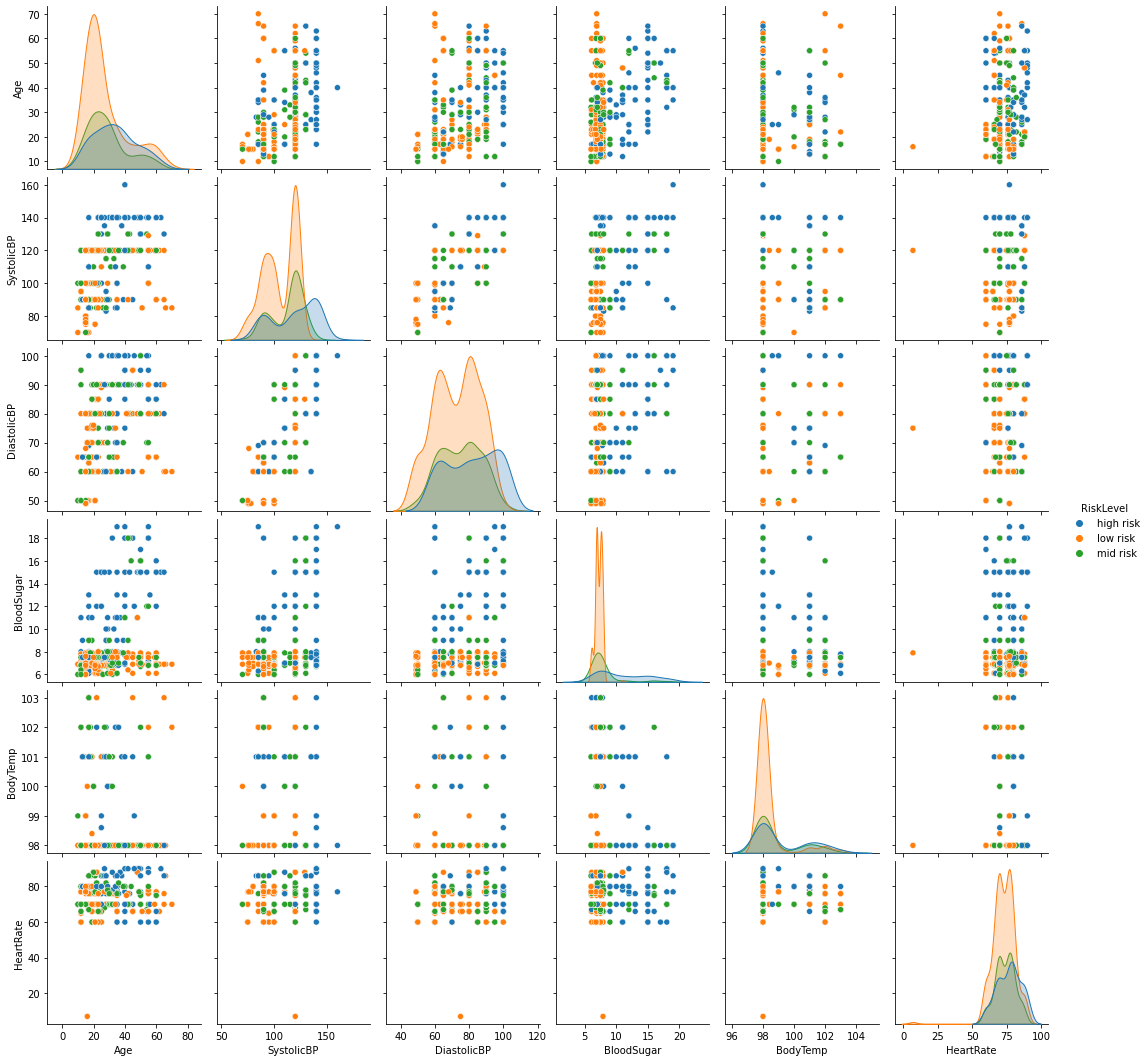

In [28]:
sns.pairplot(data=df,kind="scatter", hue="RiskLevel");
plt.show();

#### Line Chart

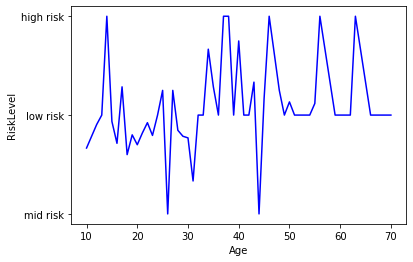

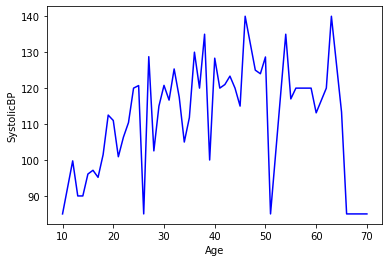

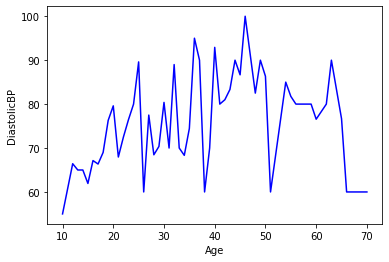

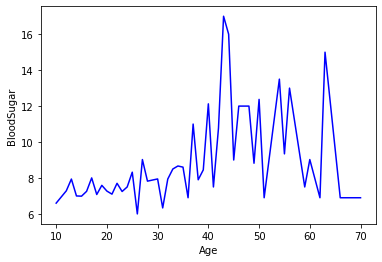

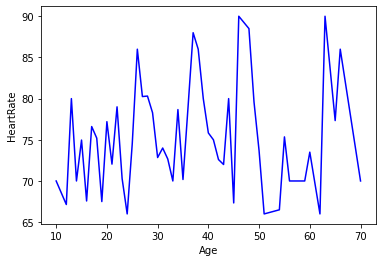

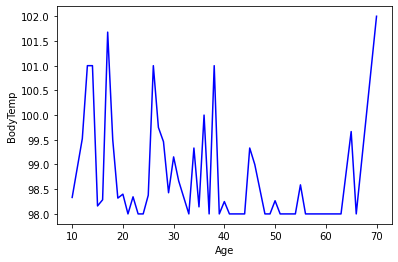

In [29]:
a = ["RiskLevel","SystolicBP","DiastolicBP","BloodSugar","HeartRate","BodyTemp"]
for i in a:
    sns.lineplot(x="Age",y=df[i],data=df,ci=None,color="Blue")
    plt.show();

#### Label Encoding

In [30]:
le = LabelEncoder()
df["RiskLevel"]=le.fit_transform(df["RiskLevel"])

#### Scaling

In [31]:
x=df.iloc[:,:-1].values

In [32]:
y=df.iloc[:,-1].values

#### Check whether the data is imbalanced

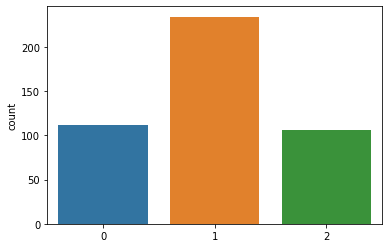

In [33]:
sns.countplot(x=y);

#### We can see that the data is balanced, so we use oversampling

###### Initialize the sampler

In [34]:
over_sampler = RandomOverSampler()

In [35]:
x,y = over_sampler.fit_resample(x,y)

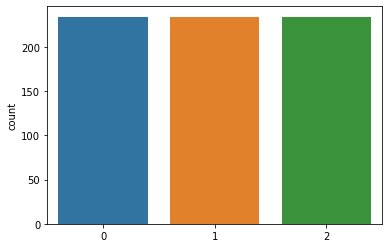

In [36]:
sns.countplot(x=y);

#### we can see now the data is balanced

##### Standarize

In [37]:
df.RiskLevel.unique()

array([0, 1, 2])

In [38]:
sc=StandardScaler()

In [39]:
x=sc.fit_transform(x)

#### Selecting Random Forest classifier

In [40]:
model = RandomForestClassifier()

In [41]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [42]:
model.fit(x_train, y_train)
print("model trained with {}".format(model))
score_train =accuracy_score (y_train, model.predict(x_train))
score_tst = accuracy_score(y_test, model.predict(x_test))
con_train = confusion_matrix(y_train, model.predict(x_train))
con_test = confusion_matrix(y_test, model.predict(x_test))
print("Model accuracy on train is:: ",score_train)
print("Model accuracy on test is:: ", score_tst)
print("confusion_matrix train is:: ", con_train)
print("confusion_matrix test is:: ", con_test)
print("Wrong Predictions made:",(y_test !=model.predict(x_test)).sum(),'/',((y_test == model.predict(x_test)).sum()+(y_test != model.predict(x_test)).sum()))
print("*"*60)

model trained with RandomForestClassifier()
Model accuracy on train is::  0.9447415329768271
Model accuracy on test is::  0.7730496453900709
confusion_matrix train is::  [[178   0   4]
 [  5 169  15]
 [  1   6 183]]
confusion_matrix test is::  [[48  0  4]
 [ 2 36  7]
 [ 6 13 25]]
Wrong Predictions made: 32 / 141
************************************************************


##### Now we can Compare the actual and predicted value

In [43]:
OUTPUT= pd.DataFrame(zip(y,model.predict(x)), columns=("ACTUAL", "PREDICTION"), dtype = int)
OUTPUT.sample(10)

,ACTUAL,PREDICTION
147,1,1
355,1,1
144,0,0
389,2,1
457,0,0
306,0,0
485,0,0
347,1,1
580,2,2
208,1,1


#### Plotting Confusion Matrix for training and testing

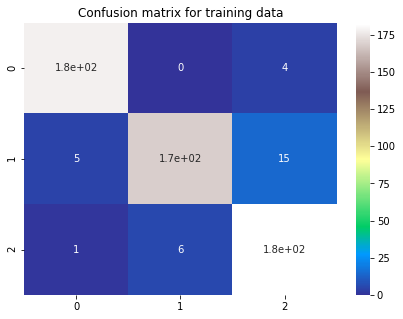

In [44]:
plt.figure(figsize=(7,5))
plt.title("Confusion matrix for training data")
sns.heatmap(con_train, annot=True, cmap='terrain');

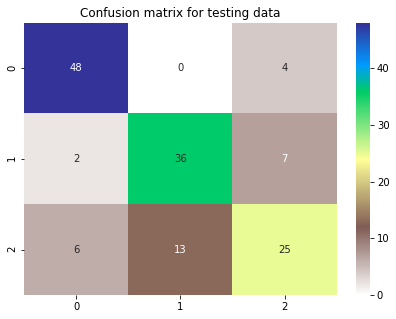

In [45]:
plt.figure(figsize=(7,5))
plt.title("Confusion matrix for testing data")
sns.heatmap(con_test, annot=True, cmap='terrain_r');

### We have to binirize the target 

In [46]:
y = label_binarize(y, classes=[0,1,2])
n_classes = 3

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

### Initialize the classifier

In [48]:
classifier = OneVsRestClassifier(RandomForestClassifier(random_state=0))
y_score = classifier.fit(x_train, y_train).predict_proba(x_test)

### Computing ROC and AUC

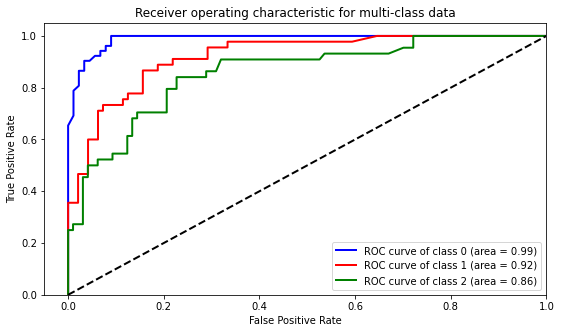

In [49]:
plt.figure(figsize=(9,5))
fpr = dict()
tpr = dict()
roc_auc = dict()
lw=2
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green', 'yellow', 'orange', 'pink'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show();